In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import clear_output
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats as sp

In [77]:
df = pd.read_csv("inflation.csv",on_bad_lines='skip')

In [78]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.773751
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,...,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727
264,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.733060,22.020768,10.993204


In [79]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              196
                 ... 
2018               40
2019               41
2020               47
2021               49
2022               53
Length: 67, dtype: int64

In [80]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,70.000000,72.000000,74.000000,74.000000,79.000000,86.000000,93.000000,100.000000,101.000000,102.000000,...,236.000000,235.000000,234.000000,234.000000,229.000000,226.000000,225.000000,219.000000,217.000000,213.000000
mean,3.554980,3.491289,4.630783,5.846612,6.263870,8.192841,17.765764,5.469524,6.309715,4.446334,...,4.086962,3.641814,3.583079,6.037074,4.745071,4.073718,4.625086,6.808725,7.536469,11.576795
std,6.795697,4.508248,15.209955,17.152509,13.749261,33.376181,117.536433,14.150802,18.309690,4.140570,...,5.071567,5.580504,9.636442,30.096984,13.085154,7.532590,18.422992,39.599501,27.451923,17.605392
min,-5.030042,-3.900000,-3.846154,-2.694655,-4.535654,-3.878976,-1.361868,-8.422486,-10.033895,-4.339051,...,-4.294873,-1.509245,-3.749145,-3.078218,-1.537100,-2.814698,-3.233389,-2.595243,-0.772844,-6.687321
25%,0.871370,1.468978,1.147323,1.790965,1.870349,1.940405,2.479008,1.564937,1.588785,2.347005,...,1.463358,0.926777,0.309365,0.455380,1.429107,1.627863,1.108255,0.602391,2.343284,5.821158
50%,1.945749,2.102977,2.669962,2.898982,3.328408,3.410026,3.815659,3.020244,3.161937,3.388412,...,2.774232,2.626684,1.557907,1.675408,2.450534,2.597456,2.206073,2.002412,3.653533,8.160590
75%,4.037155,3.601606,4.614353,4.998460,4.822426,4.938170,6.951872,4.500319,4.697428,5.811237,...,5.363191,4.632431,4.067377,4.330767,4.520229,4.039775,3.322559,3.723892,5.214049,10.773751
max,39.590444,22.747264,131.397850,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,21.763295,...,40.639428,62.168650,121.738085,379.999586,187.851630,83.501529,255.304991,557.201817,359.093041,171.205491


In [133]:
#df.fillna(0, inplace = True)
#df.dropna(inplace=True)
df2 = df.dropna(subset=['2013'],axis=0)
#df=df.replace(np.nan,None)

In [82]:
df2.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              167
                 ... 
2018               10
2019               11
2020               17
2021               19
2022               23
Length: 67, dtype: int64

In [83]:
df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.773751
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,...,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727
264,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.733060,22.020768,10.993204


In [84]:
df2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,69.000000,71.000000,73.000000,73.000000,78.000000,85.000000,92.000000,99.000000,100.000000,101.000000,...,236.000000,235.000000,234.000000,234.000000,229.000000,226.000000,225.000000,219.000000,217.000000,213.000000
mean,3.532314,3.512872,4.746906,5.900446,6.274989,8.334862,17.917638,5.459579,6.344325,4.510047,...,4.086962,3.641814,3.583079,6.037074,4.745071,4.073718,4.625086,6.808725,7.536469,11.576795
std,6.842817,4.536588,15.282150,17.264917,13.837896,33.548111,118.171297,14.222465,18.398610,4.110666,...,5.071567,5.580504,9.636442,30.096984,13.085154,7.532590,18.422992,39.599501,27.451923,17.605392
min,-5.030042,-3.900000,-3.003077,-2.694655,-4.535654,-2.726980,-1.361868,-8.422486,-10.033895,-4.339051,...,-4.294873,-1.509245,-3.749145,-3.078218,-1.537100,-2.814698,-3.233389,-2.595243,-0.772844,-6.687321
25%,0.827301,1.415199,1.198773,1.762503,1.857736,1.958913,2.450283,1.532263,1.559161,2.385159,...,1.463358,0.926777,0.309365,0.455380,1.429107,1.627863,1.108255,0.602391,2.343284,5.821158
50%,1.945749,2.103579,2.677860,2.921641,3.326221,3.414479,3.830158,3.016948,3.199675,3.409820,...,2.774232,2.626684,1.557907,1.675408,2.450534,2.597456,2.206073,2.002412,3.653533,8.160590
75%,3.728814,3.660973,4.691144,4.999153,4.412544,4.940588,6.980144,4.404988,4.761663,5.835232,...,5.363191,4.632431,4.067377,4.330767,4.520229,4.039775,3.322559,3.723892,5.214049,10.773751
max,39.590444,22.747264,131.397850,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,21.763295,...,40.639428,62.168650,121.738085,379.999586,187.851630,83.501529,255.304991,557.201817,359.093041,171.205491


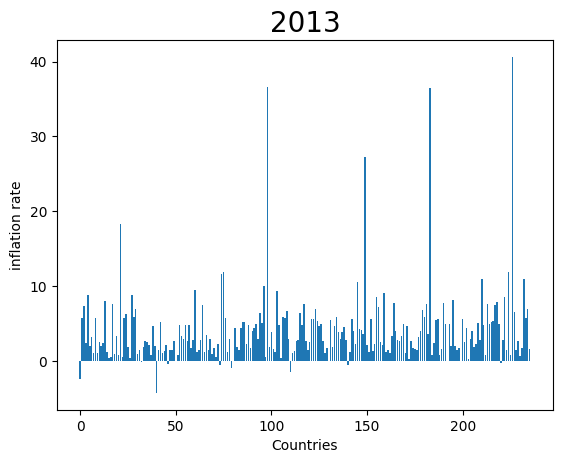

In [136]:
fig = plt.figure()
labels =  np.arange(0,236)
plt.bar(labels,df2["2013"])
plt.title('2013', fontsize=20)
plt.xlabel('Countries')
plt.ylabel("inflation rate")
plt.show()

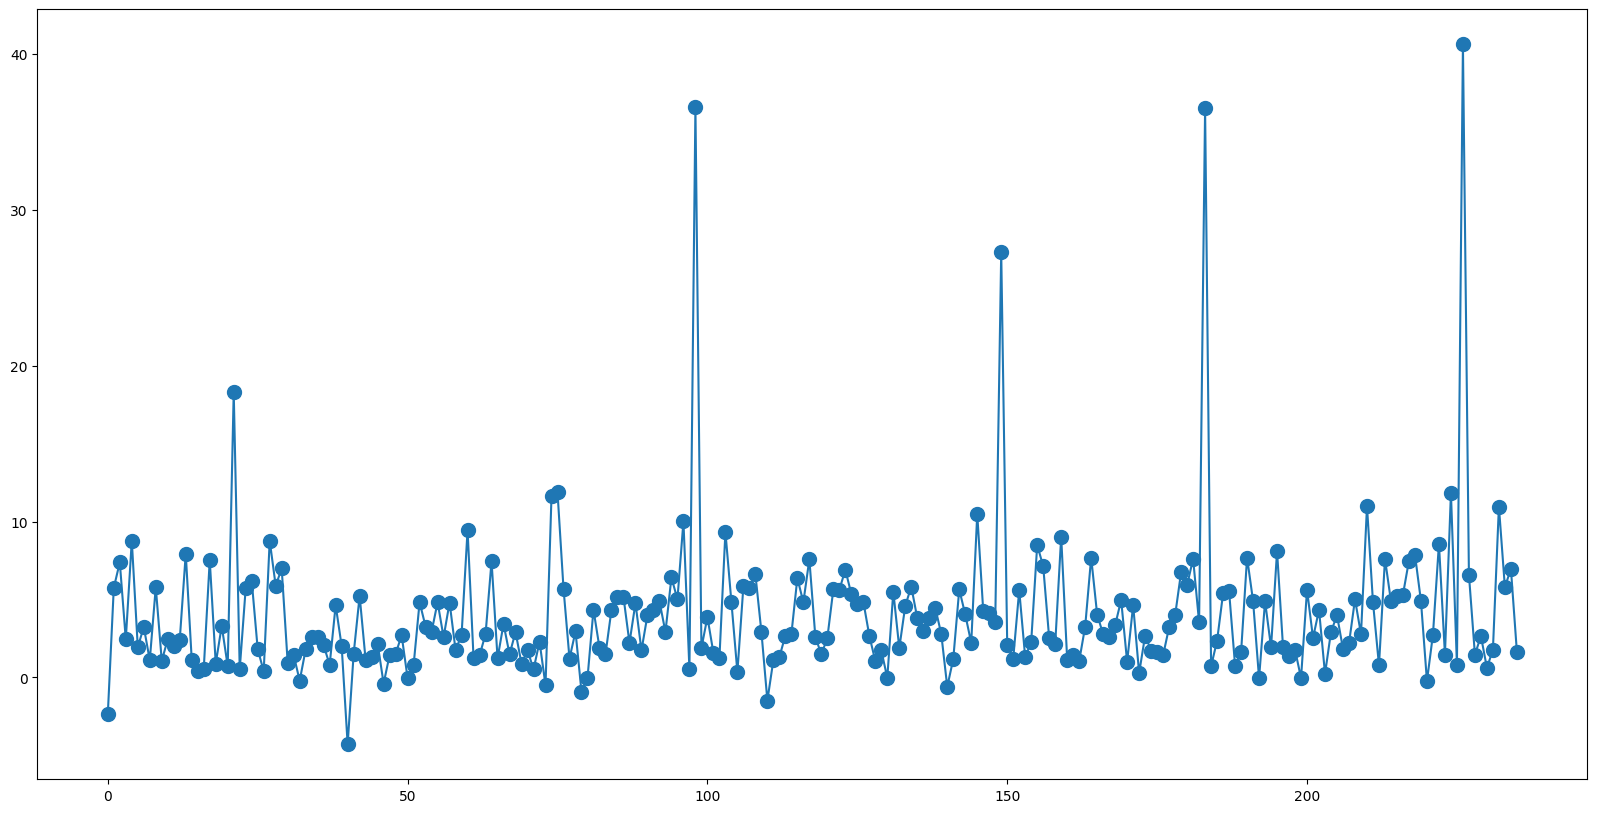

In [135]:
_ = plt.figure(figsize=(20, 10))
plt.plot(labels,df2["2013"] )
plt.scatter(labels,df2["2013"], s=100)
plt.show()

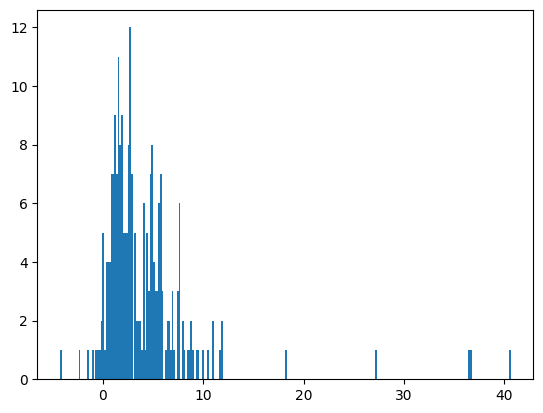

In [137]:
fig = plt.figure()
plt.hist(df2["2013"],bins=266)
plt.show()

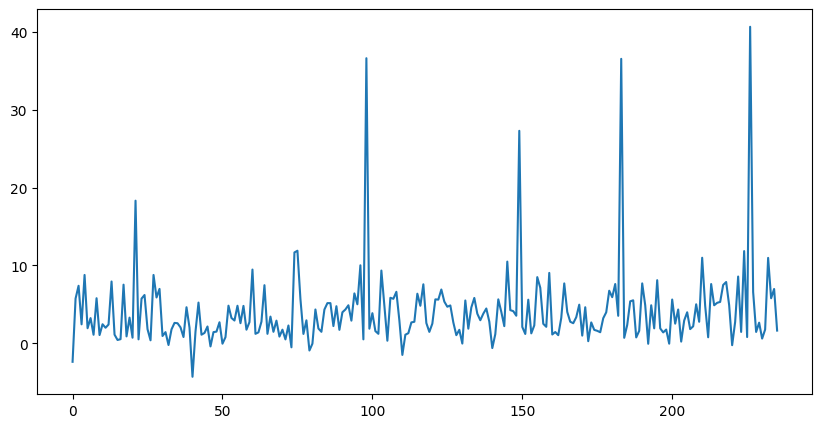

In [138]:
_ = plt.figure(figsize=(10, 5))
plt.plot(labels,df2["2013"])
plt.show()

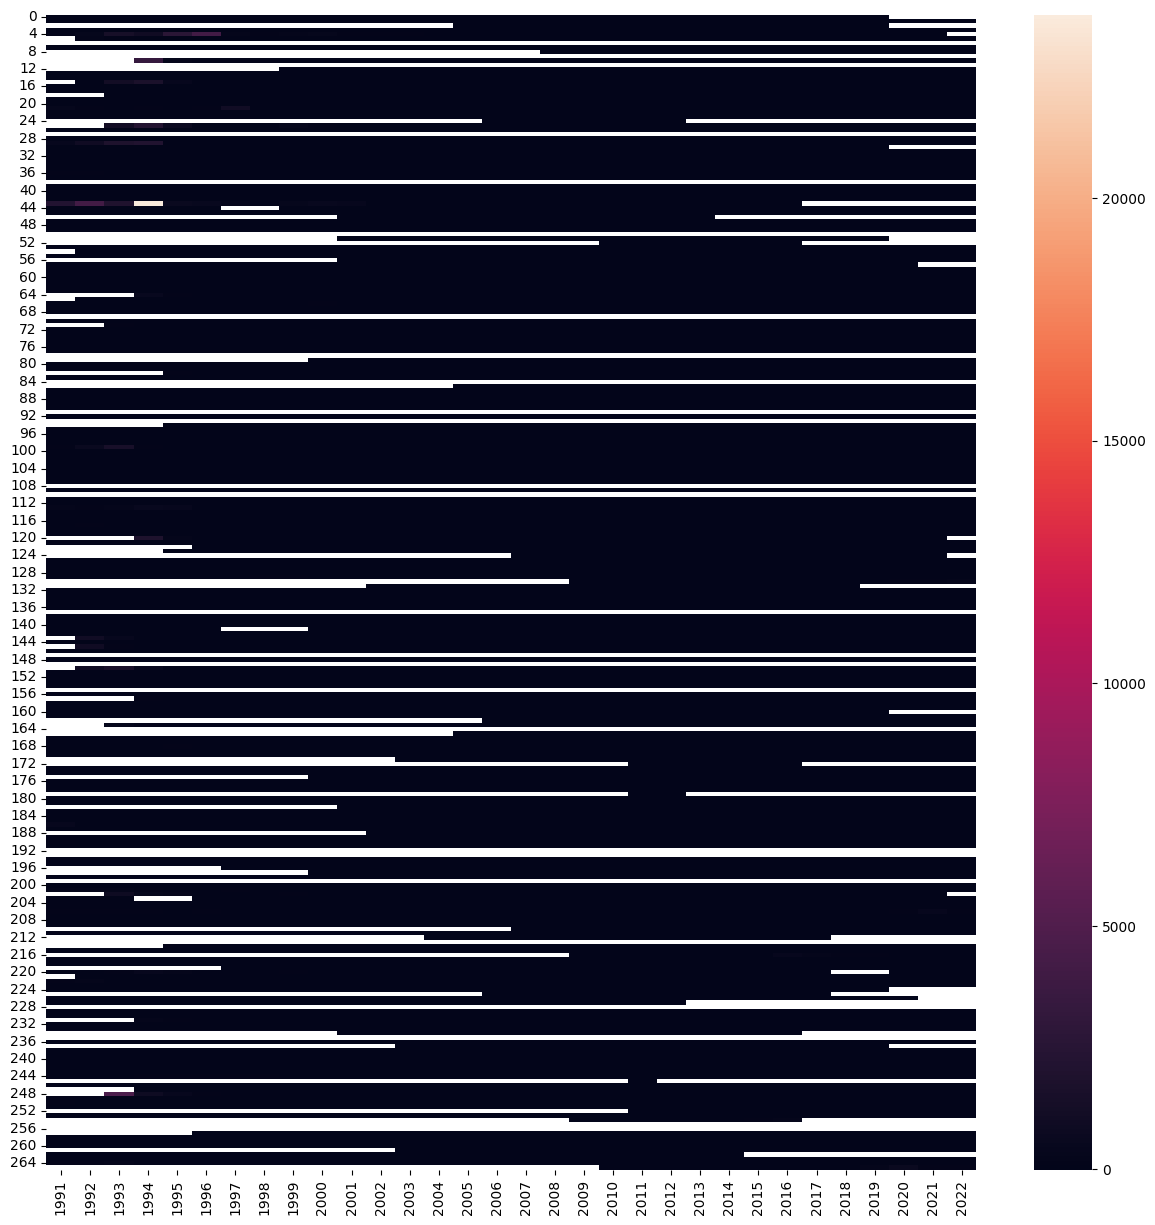

In [89]:
import seaborn as sns

labels = df.index
listheat=[]

for i in df:
  if (i.isnumeric()):
    listheat.append(str(i))
listheat = listheat[31:] # since data start from 1991
heatmap = pd.DataFrame(df[listheat],labels)
plt.figure(figsize=(15,15))
p1 = sns.heatmap(heatmap)

In [90]:
import pandas as pd

df3 = pd.Series([1, 'abc', '123', 'xyz', 456])
numeric_values = []
for i in df3:
       if str(i).isnumeric():
        numeric_values.append(str(i))

print(numeric_values)

['1', '123', '456']


In [91]:
np.mean(df2["2013"])
np.std(df2["2013"])
np.median(df2["2013"])
sp.stats.mode(df2["2013"]) # dont have this in describe

<ipython-input-91-9be4ae0a2ffa>:4: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.mode(df2["2013"]) # dont have this in describe


ModeResult(mode=1.219993423, count=3)

In [92]:
sp.stats.skew(df2["2013"])

<ipython-input-92-931a7c76c446>:1: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.skew(df2["2013"])


4.345431807033105

In [93]:
df2["2013"].min(), df2["2013"].max()

(-4.294873315, 40.63942752)

In [94]:
countries = df["Country Name"]
CountriesSearch = df[df["Country Name"] == "Nigeria"]

In [95]:
CountriesSearch

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
174,Nigeria,NGA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,5.444327,6.279147,5.265632,-2.694655,0.856793,4.103459,...,8.495518,8.047411,9.009435,15.696813,16.502266,12.095107,11.396422,13.246023,16.952846,18.847188


In [96]:
df3 =CountriesSearch.dropna(axis=1)# columns
df3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
174,Nigeria,NGA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,5.444327,6.279147,5.265632,-2.694655,0.856793,4.103459,...,8.495518,8.047411,9.009435,15.696813,16.502266,12.095107,11.396422,13.246023,16.952846,18.847188


In [97]:
list=[] #x values
list2=[] #y values

for i in df3:
  if (i.isnumeric()):
    list.append(str(i))
for i in list:
   list2.append(float(df3[i]))


#for graphs

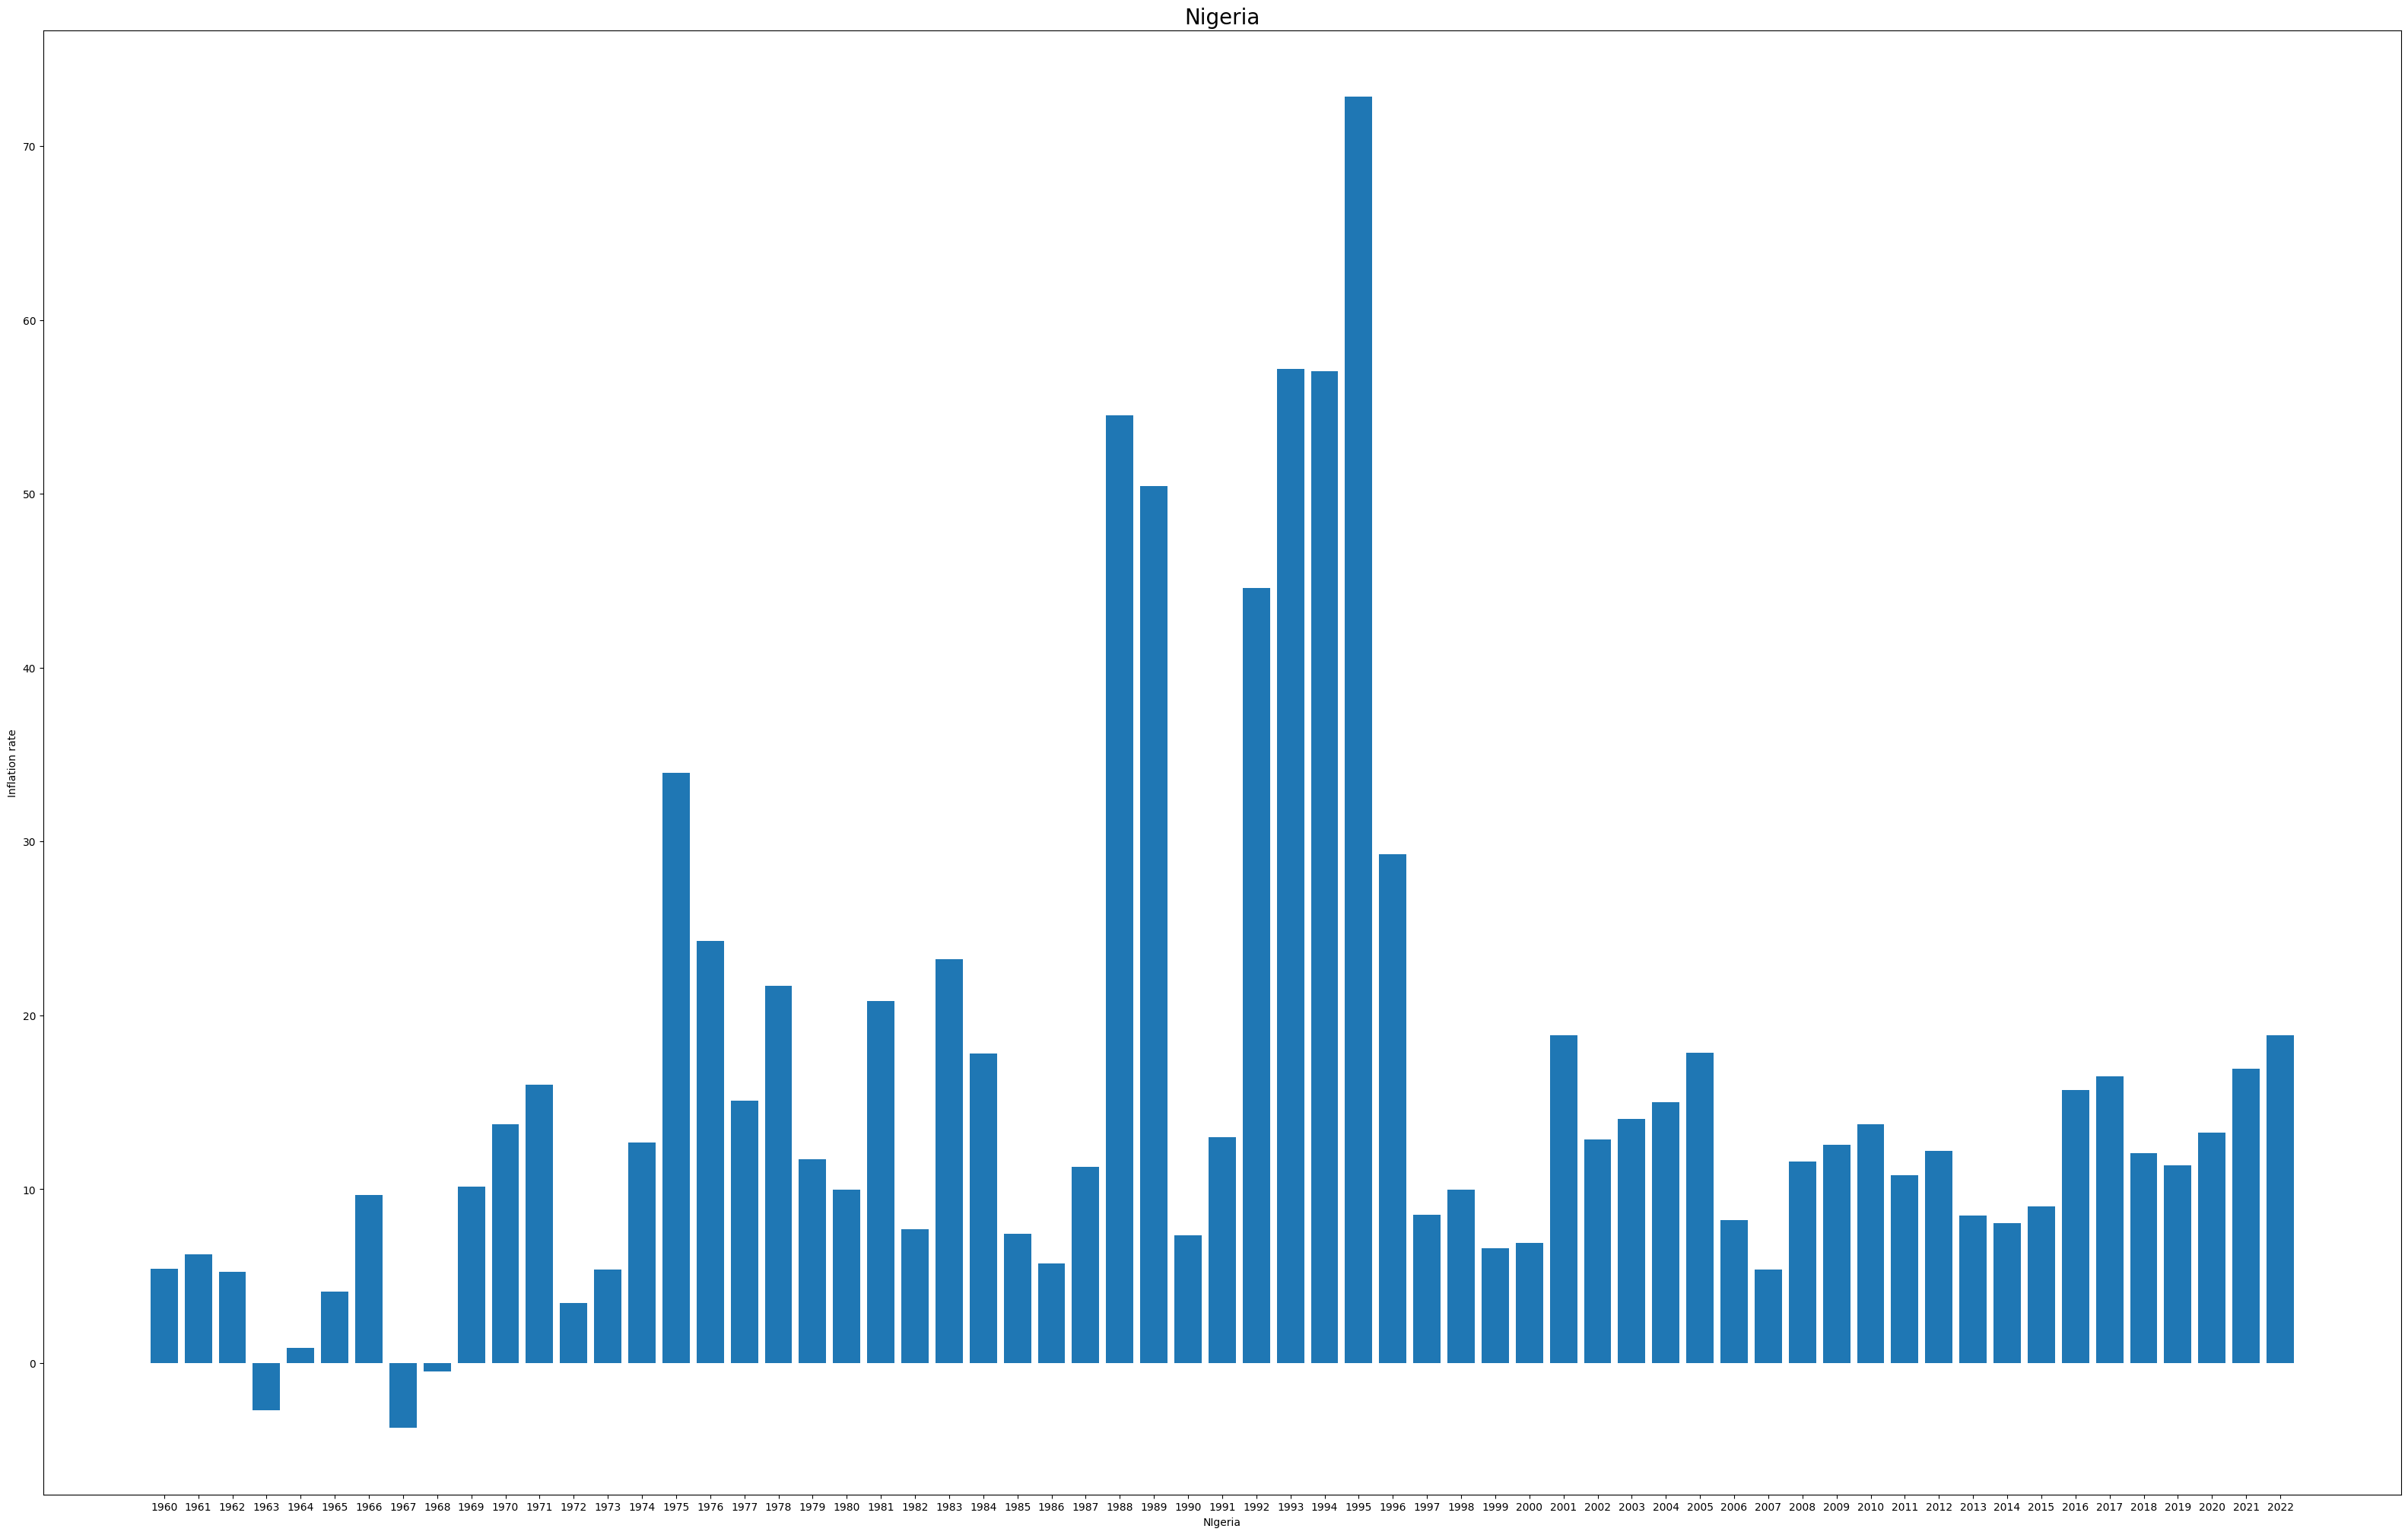

In [128]:
fig = plt.figure(figsize=(40, 25))
labels =  list
labels2 = list2

plt.bar(labels,list2)
plt.title('Nigeria', fontsize=20)
plt.xlabel('NIgeria')
plt.ylabel("Inflation rate")
plt.show()

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import clear_output
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats as sp
def animate_country_id(time):
    countries = df["Country Name"]
    print(countries[time])

# Create the widget
widget = widgets.interact(animate_country_id, time=widgets.FloatSlider(min=0, max=265, step=1, value=0))

interactive(children=(FloatSlider(value=0.0, description='time', max=265.0, step=1.0), Output()), _dom_classes…

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import clear_output
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats as sp
def animate_country(time):
    fig = plt.figure(figsize=(30, 10))
    plt.ylim(40)
    plt.xlim(265)
    plt.xticks(np.arange(0, 266, step=5))
    #df2 = df.dropna(subset=[str(int(time))],axis=0) #celaning data
    df2 = df
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    clear_output(wait=True)
    labels =  np.arange(0,len(df2))
    plt.bar(labels,df2[str(int(time))])
    plt.title(time, fontsize=20)
    plt.xlabel('Countries')
    plt.ylabel("Inflation rate")
    plt.show()

# Create the widget
widget = widgets.interact(animate_country, time=widgets.FloatSlider(min=1960, max=2022, step=1, value=1991))




interactive(children=(FloatSlider(value=1991.0, description='time', max=2022.0, min=1960.0, step=1.0), Output(…

In [101]:
listofCountries=[] #x values
countries = df["Country Name"]
for i in range(len(countries)):
  listofCountries.append(countries[i])

Dropdown(description='Select an Country:', options=('Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Af…

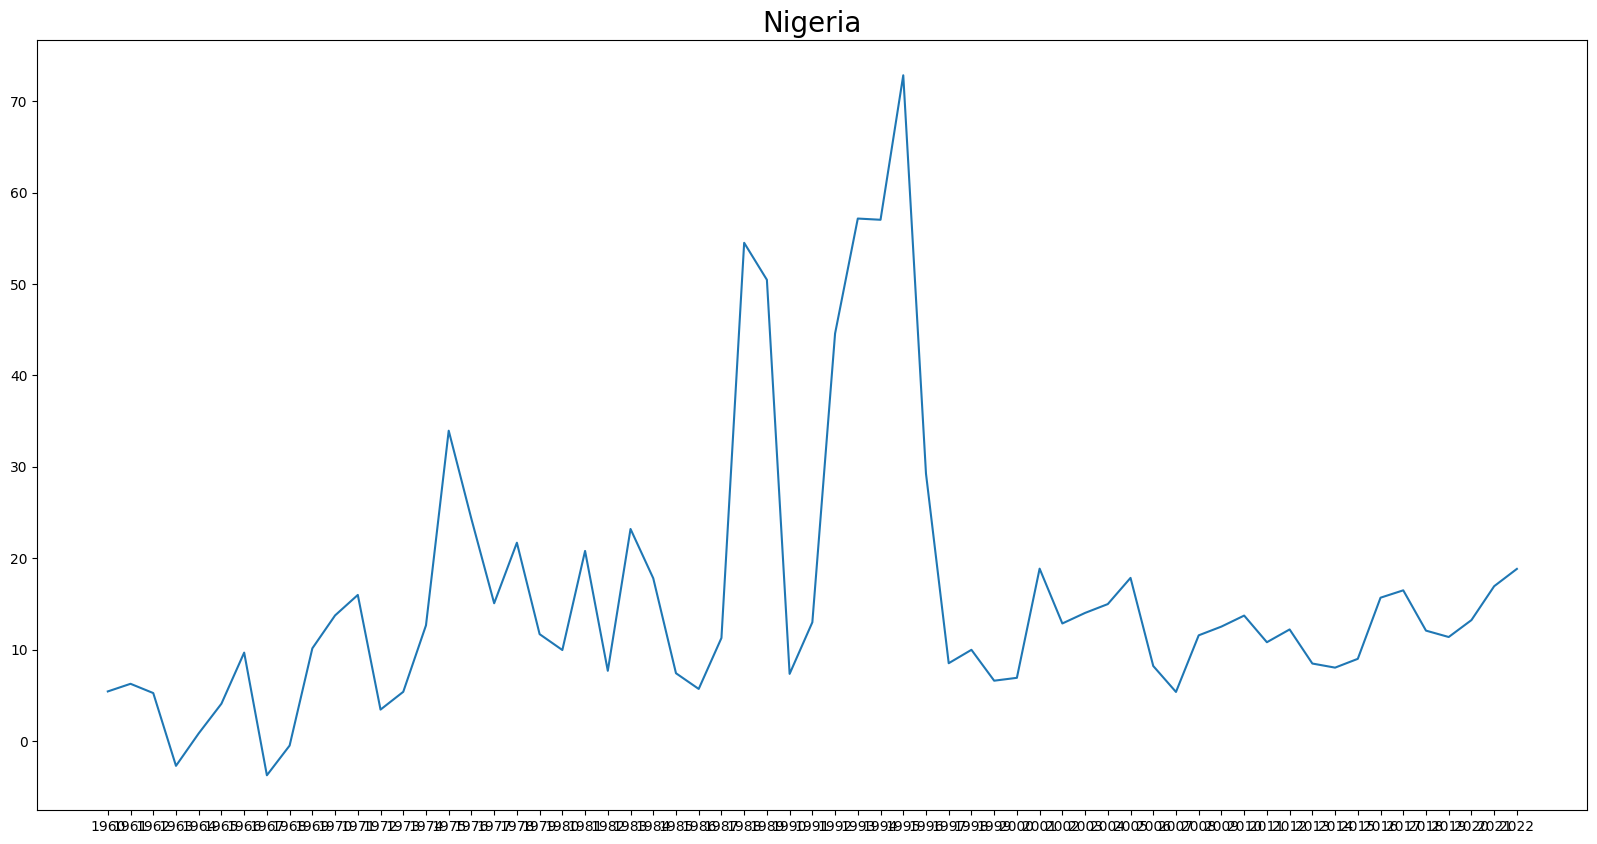

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import clear_output
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats as sp

# Define custom dropdown values
custom_values = listofCountries

# Create a dropdown widget with custom values
dropdown = widgets.Dropdown(
    options=custom_values,
    value=custom_values[0],  # Set the default value
    description='Select an Country:'
)

# Define a function to handle dropdown value changes
def on_dropdown_change(change):
   fig = plt.figure(figsize=(20, 10))
   #clear_output(wait=True) # to update and replace current graph
   #display(dropdown)
   selected_value = change['new']
   CountriesSearch = df[df["Country Name"]==selected_value]
   df3 =CountriesSearch.dropna(axis=1) #this cleans the data
   list=[] #x values
   list2=[] #y values

   for i in df3:
    if (i.isnumeric()):
      list.append(str(i))
   for i in list:
      list2.append(float(df3[i]))
   plt.title(selected_value, fontsize=20)
   plt.plot(list,list2)
   plt.show()
   df3

# Attach the function to the dropdown's observe event
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(dropdown)

In [103]:
def outlier_thresholds(data):
  avg = np.mean(data)
  low = np.quantile(data, 0.01)
  high = np.quantile(data, 0.99)
  iqr = high - low
  min = avg - 1.5*iqr
  max = avg + 1.5*iqr
  return min, max

def remove_outliers(df):
  columns = df.columns
  for column in columns:
    data = df[column]
    min, max = outlier_thresholds(data)
    df[df[column] < min] = None
    df[df[column] > max] = None
  df.dropna(inplace=True)
  return df


In [104]:
list=[]
for i in df3:
  if (i.isnumeric()):
    list.append(i)
df1 = df[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
print(f"Number of rows before eliminating outliers: {len(df1)}.")
df1 = remove_outliers(df1)
print(f"Number of rows after eliminating outliers: {len(df1)}.")

Number of rows before eliminating outliers: 266.
Number of rows after eliminating outliers: 165.


<ipython-input-103-227c3042d963>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < min] = None
<ipython-input-103-227c3042d963>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > max] = None
<ipython-input-103-227c3042d963>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=Tr

In [105]:
gdpdf = pd.read_csv("GDP.csv",on_bad_lines='skip')

In [106]:
gdpdf

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.863430e+11,1.006990e+12,9.325130e+11,8.900510e+11,1.028390e+12,1.012520e+12,1.006190e+12,9.288800e+11,1.086530e+12,1.185140e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.340970e+11,8.945050e+11,7.692630e+11,6.921150e+11,6.856300e+11,7.681580e+11,8.234060e+11,7.869620e+11,8.449280e+11,8.753940e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.323390e+11,1.359670e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067830e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735329e+09,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.382910e+11,4.201180e+11,4.052710e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10


In [107]:
gdpdf.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2018                8
2019                8
2020                9
2021               10
2022               23
Length: 67, dtype: int64

In [108]:
dfonlyNum= df
for i in dfonlyNum:
  if (i.isnumeric()==False):
    dfonlyNum=dfonlyNum.drop(i,axis=1)

gdpdfonlyNum = gdpdf
for i in gdpdfonlyNum :
  if (i.isnumeric()==False):
    gdpdfonlyNum =gdpdfonlyNum .drop(i,axis=1)

dfonlyNum.fillna(0, inplace = True)
gdpdfonlyNum.fillna(0, inplace = True)

for i in range (1960,1991):
  dfonlyNum=dfonlyNum.drop(str(i),axis=1)
for i in range (1960,1991):
  gdpdfonlyNum=gdpdfonlyNum.drop(str(i),axis=1)

In [109]:
dfonlyNum= df
for i in dfonlyNum:
  if (i.isnumeric()==False):
    dfonlyNum=dfonlyNum.drop(i,axis=1)

gdpdfonlyNum = gdpdf
for i in gdpdfonlyNum :
  if (i.isnumeric()==False):
    gdpdfonlyNum =gdpdfonlyNum .drop(i,axis=1)


In [111]:
corr_coef = remove_cor_features(dfonlyNum,gdpdfonlyNum)

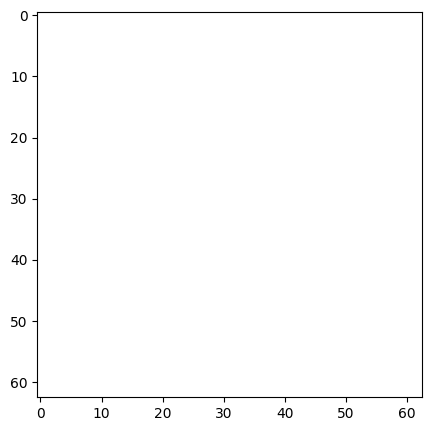

In [112]:
plt.figure(figsize=(5, 5))
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.imshow(corr_coef)
plt.show()

In [113]:
bootstrap_means = []
n_trials = 1000000
for _ in range(n_trials):
    bootstrap_sample = np.random.choice(df2["2013"], replace=True, size=1000)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)
bootstrap_means = np.array(bootstrap_means)



t_statistic, p_value = sp.ttest_1samp(bootstrap_means, np.mean(df2["2013"]))
print(f"{t_statistic=}")
print(f"{p_value=}")

t_statistic=0.054171913989968214
p_value=0.9567982080273544


In [117]:
# Install necessary libraries
!pip install plotly

# Import libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate fictional inflation data
import pandas as pd
import numpy as np

np.random.seed(123)
date_rng = pd.date_range(start='1960-01-01', end='2022-12-31', freq='D')
inflation_df = pd.DataFrame({
    'Date': date_rng,
    'Inflation Rate': np.random.uniform(0, 5, size=(len(date_rng))),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Books'], size=(len(date_rng)))
})

# Line chart for inflation over time
line_fig = px.line(inflation_df, x='Date', y='Inflation Rate', color='Category',
                   title='Inflation Over Time',
                   labels={'Inflation Rate': 'Inflation Rate (%)', 'Date': 'Date'})

# Bar chart for inflation distribution by category
bar_fig = px.bar(inflation_df, x='Category', y='Inflation Rate',
                 title='Inflation Distribution by Category',
                 labels={'Inflation Rate': 'Inflation Rate (%)', 'Category': 'Category'})

# Create a subplot with two charts, one above the other
dashboard_fig = make_subplots(rows=2, cols=1, subplot_titles=["Inflation Over Time", "Inflation Distribution by Category"])
dashboard_fig.add_trace(line_fig['data'][0], row=1, col=1)
dashboard_fig.add_trace(bar_fig['data'][0], row=2, col=1)

# Update layout for better appearance
dashboard_fig.update_layout(height=600, title_text="Inflation Dashboard")

# Show the dashboard
dashboard_fig.show()